In [2]:
!pip install pulp
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 kB 1.8 MB/s eta 0:00:00a 0:00:01
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Created wheel for peewee: filename=peewee-3.17.3-cp310-cp310-linux_x86_64.whl size=275204 sha256=d6683a0788638ea0a3851e1214b0aa7ba77387abdb09edbe9b682254e4eba905
  Stored in directory: /home/jovyan/.cache/pip/wheels/ae/8c/86/590a31ee9a1ad7c9305de67f66949031988bc64e19c279b71c
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: requests 2.28.2
    Uninstalling requests-2.28.2:
   

In [3]:
!pip install cvxpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.1 MB/s eta 0:00:00a 0:00:010m
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Using cached ecos-2.0.13-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (220 kB)
  Using cached clarabel-0.7.1-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached osqp-0.6.5-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (298 kB)
  Using cached scs-3.2.4.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.6 MB/s eta 0:00:00


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import cvxpy as cp
import scipy.linalg as la
import pulp

In [4]:
T = 1 # Number of days in time period
R = []
assets = ["AAPL","EA","MSFT","NFLX","GOOGL","TSLA"]

for stock in assets:
    data = yf.Ticker(stock)
    # 我先改成1年， 这个之后可以随时改成想要的时段
    df = data.history(period="1y")

    # close values on that day
    close = df['Close'].values

    # convert day to day close values to return
    returns = (close[T:] - close[:-T])/close[:-T]
    R.append(returns)

R = np.array(R).T
r = np.mean(R,axis=0)
S = np.cov(R.T)

In [100]:
R

array([[-0.00435327,  0.00358049,  0.00233358, -0.02122939, -0.00673943,
        -0.03346004],
       [ 0.03410362,  0.01704586,  0.02239938,  0.04579646,  0.02666285,
         0.02968872],
       [-0.00211396, -0.00319602, -0.0127656 , -0.02183771,  0.0134041 ,
        -0.00484128],
       ...,
       [-0.00666355, -0.00222575, -0.00218554, -0.01221356,  0.01540988,
         0.04899941],
       [ 0.00724251,  0.00530771,  0.00398032, -0.01624729,  0.01130126,
         0.02254601],
       [-0.01113927, -0.01063585, -0.00708452,  0.0006147 , -0.00293746,
        -0.02894624]])

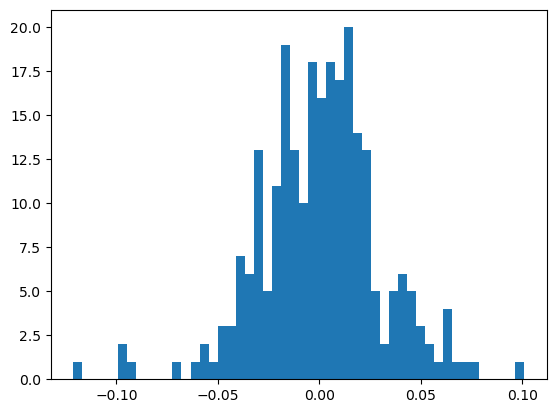

In [9]:
return_TSLA = R[:,-1]
plt.hist(return_TSLA,bins=50)
plt.show()

In [10]:
r

array([0.00023118, 0.00018604, 0.00161706, 0.00262249, 0.00165902,
       0.00013371])

In [11]:
S

array([[1.46487467e-04, 4.51157850e-05, 8.21791152e-05, 9.53603279e-05,
        9.42188118e-05, 1.32088499e-04],
       [4.51157850e-05, 1.24517103e-04, 3.93550841e-05, 4.06832438e-05,
        3.81615653e-05, 9.09659282e-05],
       [8.21791152e-05, 3.93550841e-05, 1.92515116e-04, 1.22772696e-04,
        1.00013200e-04, 1.06801511e-04],
       [9.53603279e-05, 4.06832438e-05, 1.22772696e-04, 5.01255059e-04,
        1.14221919e-04, 1.24699021e-04],
       [9.42188118e-05, 3.81615653e-05, 1.00013200e-04, 1.14221919e-04,
        2.92762801e-04, 1.35050530e-04],
       [1.32088499e-04, 9.09659282e-05, 1.06801511e-04, 1.24699021e-04,
        1.35050530e-04, 9.07600181e-04]])

# Data Processing - New Try

In [5]:
from datetime import datetime, timedelta, date

## 5 Metals

In [7]:
end_date = datetime.today()
start_date = end_date - timedelta(days = 1*365)

In [6]:
assets = ["GC=F", "SI=F", "HG=F", "PA=F", "PL=F"]

In [8]:
close = pd.DataFrame()
for s in assets:
    data = yf.download(s, start=start_date, end=end_date)
    close[s] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


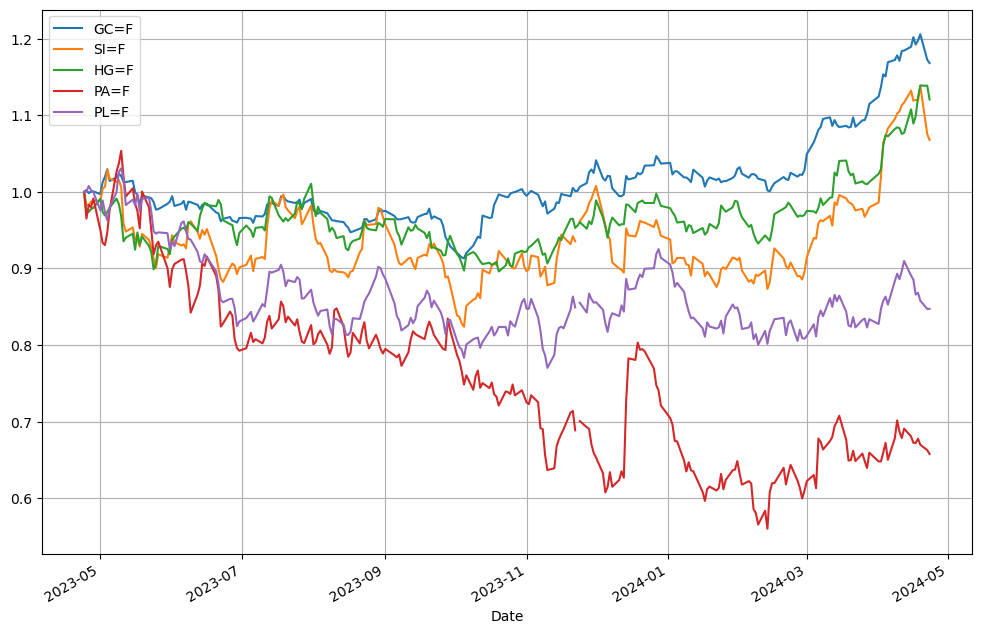

In [9]:
metal_ret=close/close.iloc[0]
metal_ret.plot(kind='line',figsize=(12,8),grid=True)
plt.legend(loc='best')

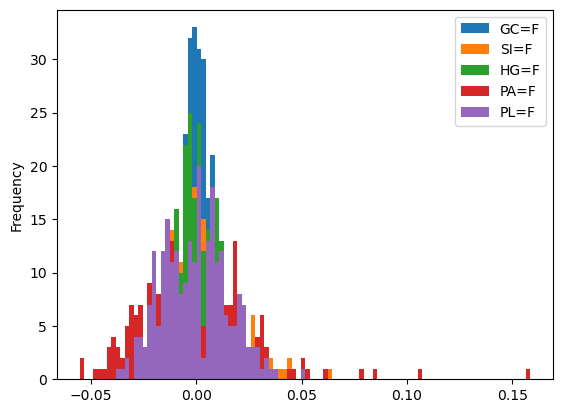

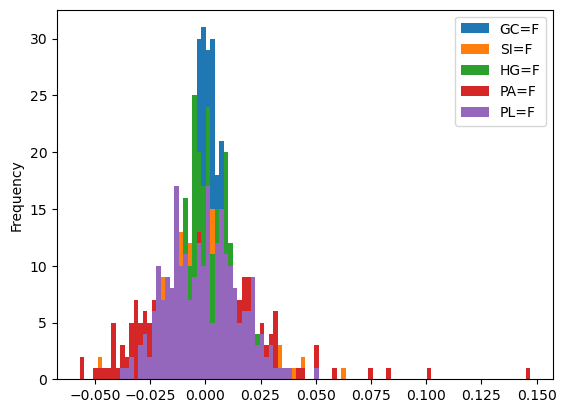

In [10]:
# normal returns
metal_ret.pct_change(1).plot.hist(bins=100)
plt.legend(loc='best')
# log returns
log_ret=np.log(metal_ret/metal_ret.shift(1))
log_ret.plot.hist(bins=100)
plt.legend(loc='best')

model 1A

In [11]:
metal_ret = metal_ret.dropna()
log_ret = log_ret.dropna()

In [12]:
#The sum of the average logarithmic returns of 252 days
mean_ret=log_ret.mean()*252
#252 days of assets constitute a bias matrix
metal_covar=log_ret.cov()*252

In [15]:
R = log_ret.to_numpy()
r = mean_ret.to_numpy()
S = np.cov(R.T)

print(R)
print(r)
print(S)

[[ 0.00246041 -0.0170978  -0.02744117 -0.03556728  0.00045912]
 [-0.0041712  -0.00024124  0.00103949  0.01844019  0.00713498]
 [ 0.00211293  0.00449311  0.0037592  -0.00312757 -0.00530062]
 ...
 [ 0.00673538  0.01676711  0.01375478 -0.01173003 -0.01191885]
 [-0.0279898  -0.05695837 -0.00033316 -0.01058728 -0.01282134]
 [-0.00369426 -0.00711743 -0.015789   -0.0076174   0.00032524]]
[ 0.15122707  0.03846499  0.10683928 -0.43999277 -0.17413159]
[[5.85195106e-05 8.82123215e-05 2.72889965e-05 5.86930120e-05
  5.40134050e-05]
 [8.82123215e-05 2.47854164e-04 9.20642737e-05 1.76113424e-04
  1.35041129e-04]
 [2.72889965e-05 9.20642737e-05 1.34063973e-04 1.20093417e-04
  7.69049144e-05]
 [5.86930120e-05 1.76113424e-04 1.20093417e-04 6.55774220e-04
  2.54765748e-04]
 [5.40134050e-05 1.35041129e-04 7.69049144e-05 2.54765748e-04
  2.48597307e-04]]


In [19]:
from pulp import *
import numpy as np

# Define the data
n = len(assets)  # Number of assets
T = len(R[:, 0])  # Number of time periods
r0 = 0.008

# Create a LP problem
prob = LpProblem("Financial_Portfolio_Optimization", LpMaximize)

# Define decision variables
x = [LpVariable(f"x{j}", lowBound=0) for j in range(n)]
y = [LpVariable(f"y{t}", lowBound=0) for t in range(T)]

# Define objective function
prob += -(1 / T) * lpSum(y[t] for t in range(T)), "Objective"

# Define constraints
for t in range(T):
    prob += (
        lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) <= y[t],
        f"Upper_constraint_{t}",
    )
    prob += (
        lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) >= -y[t],
        f"Lower_constraint_{t}",
    )

prob += lpSum(r[j] * x[j] for j in range(n)) == r0

prob += lpSum(x) == 1, "Sum_of_weights"

# Solve the problem
prob.solve()

# Print the results
print("Status:", LpStatus[prob.status])
print("Optimal Portfolio Weights:")
for j in range(n):
    print(f"x{j}: {value(x[j])}")
print("Expected Return (MAD):", value(lpSum(r[j] * x[j] for j in range(n))))
print("Mean Absolute Deviation (MAD):", value((1 / T) * lpSum(y[t] for t in range(T))))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/cea31e25c64f4b57909a5ee152fe6493-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/cea31e25c64f4b57909a5ee152fe6493-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 507 COLUMNS
At line 3768 RHS
At line 4271 BOUNDS
At line 4272 ENDATA
Problem MODEL has 502 rows, 255 columns and 3010 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 502 (0) rows, 255 (0) columns and 3010 (0) elements
Perturbing problem by 0.001% of 0.0041619275 - largest nonzero change 5.0026921e-06 ( 0.96766794%) - largest zero change 4.2405274e-06
0  Obj -0 Primal inf 0.87540935 (2)
31  Obj -0.0016932381 Primal inf 100.52374 (239)
78  Obj -0.0039788607 Primal inf 21.804934 (213)
126  Obj -0.0056263642 Primal inf 31.61978 (217)
175  Obj -0.0073381967 P

#### model 1b

In [20]:
# Define the data
n = 5  # Number of assets
T = len(R[:, 0])  # Number of time periods
m0 = 0.5

# Create a LP problem
prob = LpProblem("Financial_Portfolio_Optimization", LpMaximize)

# Define decision variables
x = [LpVariable(f"x{j}", lowBound=0) for j in range(n)]
y = [LpVariable(f"y{t}", lowBound=0) for t in range(T)]

# Define objective function
prob += lpSum(r[j] * x[j] for j in range(n)), "Objective"

# Define constraints
for t in range(T):
    prob += (
        lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) <= y[t],
        f"Upper_constraint_{t}",
    )
    prob += (
        lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) >= -y[t],
        f"Lower_constraint_{t}",
    )

prob += (1 / T) * lpSum(y[t] for t in range(T)) <= m0, "Risk"

prob += lpSum(x) == 1, "Sum_of_weights"

# Solve the problem
prob.solve()

# Print the results
print("Status:", LpStatus[prob.status])
print("Optimal Portfolio Weights:")
for j in range(n):
    print(f"x{j}: {value(x[j])}")
print("Expected Return (MAD):", value(lpSum(r[j] * x[j] for j in range(n))))
print("Mean Absolute Deviation (MAD):", value((1 / T) * lpSum(y[t] for t in range(T))))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/80914f573cd94f7bac15c8d39c429437-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/80914f573cd94f7bac15c8d39c429437-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 507 COLUMNS
At line 3768 RHS
At line 4271 BOUNDS
At line 4272 ENDATA
Problem MODEL has 502 rows, 255 columns and 3255 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 502 (0) rows, 255 (0) columns and 3255 (0) elements
Perturbing problem by 0.001% of 0.23819183 - largest nonzero change 9.8745577e-05 ( 0.055951085%) - largest zero change 1.0208537e-05
0  Obj -0 Primal inf 0.82046327 (1) Dual inf 0.59880691 (3)
0  Obj -0 Primal inf 0.82046327 (1) Dual inf 8.4528325e+10 (5)
36  Obj 2.347238e-11 Primal inf 0.82046327 (1) Dual inf 2.0941837e+11 (5)
79  Obj 5.1

#### 1c

In [21]:
from pulp import *

# Define the data
n = 5  # Number of assets
T = len(R[:, 0])  # Number of time periods
mu = 0.5

# Create a LP problem
prob = LpProblem("Financial_Portfolio_Optimization", LpMaximize)

# Define decision variables
x = [LpVariable(f"x{j}", lowBound=0) for j in range(n)]
y = [LpVariable(f"y{t}", lowBound=0) for t in range(T)]

# Define objective function
prob += lpSum(r[j] * x[j] for j in range(n)) * mu - (1 / T) * lpSum(y[t] for t in range(T)), "Objective"

# Define constraints
for t in range(T):
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) <= y[t], f"Upper_constraint_{t}"
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) >= -y[t], f"Lower_constraint_{t}"

prob += lpSum(x) == 1, "Sum_of_weights"

# Solve the problem
prob.solve()

# Print the results
print("Status:", LpStatus[prob.status])
print("Optimal Portfolio Weights:")
for j in range(n):
    print(f"x{j}: {value(x[j])}")
print("Expected Return (MAD):", value(lpSum(r[j] * x[j] for j in range(n))))
print("Mean Absolute Deviation (MAD):", value((1 / T) * lpSum(y[t] for t in range(T))))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/89b4715865504928acb8eb68abbe6d30-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/89b4715865504928acb8eb68abbe6d30-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 506 COLUMNS
At line 3767 RHS
At line 4269 BOUNDS
At line 4270 ENDATA
Problem MODEL has 501 rows, 255 columns and 3005 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 501 (0) rows, 255 (0) columns and 3005 (0) elements
Perturbing problem by 0.001% of 0.1078764 - largest nonzero change 9.1198931e-06 ( 0.97769508%) - largest zero change 0
0  Obj -0 Primal inf 0.82046327 (1) Dual inf 0.24191697 (3)
0  Obj -0 Primal inf 0.82046327 (1) Dual inf 7.1081345e+10 (5)
36  Obj 6.5915118e-12 Primal inf 0.82046327 (1) Dual inf 1.5897921e+11 (4)
79  Obj 9.9295046e-12 Pr

In [22]:
# Calculate daily returns
returns = log_ret

# Calculate mean return and covariance matrix
mean_return = returns.mean()
cov_matrix = returns.cov()
mean_absolute_deviation = returns.abs().mean()

# Number of assets
n_assets = 5

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/e6f4545fbc1f46fa82903212dbc77d0f-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/e6f4545fbc1f46fa82903212dbc77d0f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9923 COLUMNS
At line 74388 RHS
At line 84307 BOUNDS
At line 84308 ENDATA
Problem MODEL has 9918 rows, 4963 columns and 59506 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve determined that the problem was infeasible with tolerance of 1e-08
Analysis indicates model infeasible or unbounded
1 infeasibilities
Analysis indicates model infeasible or unbounded
Perturbing problem by 0.001% of 0.028106563 - largest nonzero change 5.0261889e-06 ( 50.236584%) - largest zero change 4.0927986e-06
0  Obj -0 Primal inf 0.14878383 (1)
103  Obj -0.00016211361 Primal inf 

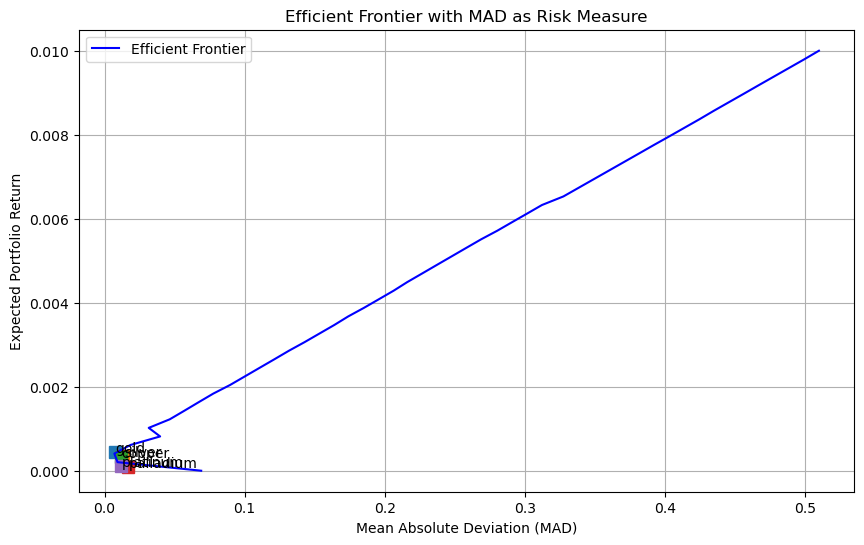

In [111]:
# Define the efficient frontier function
def efficient_frontier(R, assets):
    # Define the data
    n = len(assets)  # Number of assets
    T = len(R[:, 0])  # Number of time periods

    m0_array = np.linspace(0.0, 0.01, 50)
    risk_array = np.zeros_like(m0_array)
    portfolio_returns = []
    portfolio_mads = []

    for i, m0 in enumerate(m0_array):
        # Create a LP problem
        prob = LpProblem("Financial_Portfolio_Optimization", LpMaximize)

        # Define decision variables
        x = [LpVariable(f"x{j}", lowBound=0) for j in range(n)]
        y = [LpVariable(f"y{t}", lowBound=0) for t in range(T)]

        # Define objective function
        prob += -(1 / T) * lpSum(y[t] for t in range(T)), "Objective"

        # Define constraints
        for t in range(T):
            prob += (
                lpSum(x[j] * (R[t][j] - mean_return[j]) for j in range(n)) <= y[t],
                f"Upper_constraint_{t}",
            )
            prob += (
                lpSum(x[j] * (R[t][j] - mean_return[j]) for j in range(n)) >= -y[t],
                f"Lower_constraint_{t}",
            )

        prob += lpSum(mean_return[j] * x[j] for j in range(n)) == m0

        prob += lpSum(x) == 1, "Sum_of_weights"

        # Solve the problem
        prob.solve()
        
        # Calculate portfolio return and MAD
        portfolio_return = value(lpSum(mean_return[j] * x[j] for j in range(n)))
        portfolio_mad = value((1 / T) * lpSum(y[t] for t in range(T)))

        # Store portfolio return and MAD
        portfolio_returns.append(portfolio_return)
        portfolio_mads.append(portfolio_mad)

        # Store risk
        risk_array[i] = portfolio_mad
    
    return risk_array, portfolio_returns, portfolio_mads

# Calculate efficient frontier points
risk_array, portfolio_returns, portfolio_mads = efficient_frontier(returns.values, assets)

# Fit a linear regression line to the efficient frontier points
slope, intercept, _, _, _ = stats.linregress(risk_array, portfolio_returns)
efficient_line = slope * risk_array + intercept

# Plot both plots on the same graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plot daily return versus mean absolute deviation
for i, asset in enumerate(assets):
    ax.plot(mean_absolute_deviation[i], mean_return[i], "s", ms=8)
    ax.text(mean_absolute_deviation[i] * 1.03, mean_return[i], asset)

ax.set_title("Daily return versus Mean Absolute Deviation")
ax.set_xlabel("Mean Absolute Deviation in Daily Returns")
ax.set_ylabel("Mean Daily Return")
ax.grid(True)

# Plot efficient frontier
# ax.plot(risk_array, efficient_line, label='Efficient Frontier Line', color='red')
ax.plot(portfolio_mads, portfolio_returns, color='blue', label='Efficient Frontier')
ax.set_xlabel('Mean Absolute Deviation (MAD)')
ax.set_ylabel('Expected Portfolio Return')
ax.legend()
plt.title('Efficient Frontier with MAD as Risk Measure')

plt.show()


### 2A

In [24]:
import cvxpy as cp
import numpy as np

# Define the data
R_c = R - r.reshape(1, -1)
sig = np.dot(R_c.T, R_c) / T
r0 = 0.008
n = len(R[0, :])
e = np.ones((n, 1))
rq = r.reshape(n, 1)

# Define the optimization variables
X = cp.Variable((n, 1))

# Define the objective function
Objective = cp.Minimize(cp.quad_form(X, sig))

# Define the constraints
constraints = [e.T @ X == 1, X >= 0, rq.T @ X >= r0]

# Formulate the optimization problem
problem = cp.Problem(Objective, constraints)

# Solve the problem
result = problem.solve()

# Print the results
print("expected portfolio", X.value.T)
print("expected return :", (rq.T @ X.value)[0] )
print("Mean variance:", (X.value.T @ sig @ X.value)[0] )
print("Mean std:", (X.value.T @ sig @ X.value)[0]**0.5 )

expected portfolio [[ 5.38991582e-01 -4.89052527e-18  1.32933162e-01  1.15038744e-01
   2.13036512e-01]]
expected return : [0.008]
Mean variance: [0.0001466]
Mean std: [0.01210782]


#### 2B

In [26]:
# centered return
R_c = 0. * R
for j in range(len(R[0,:])):
  R_c[:,j] = R[:,j] - r[j]

#print(np.outer(R_c[0,:],R_c[0,:]))
R_c.T @ R_c

# compute the convariance matrix manually
sig = 0. * S
for i in range(len(R[:,0])):
  sig = sig + np.outer(R_c[i,:],R_c[i,:])
sig = sig / T


v0 = 0.0003
n = len(R[0,:])
e = np.ones((n,1))
rq = r.reshape(n,1)

X = cp.Variable((n,1))
Objective = cp.Maximize(rq.T@X)
constraints = [e.T@X == 1, X >= 0, cp.quad_form(X,sig) <= v0]
problem = cp.Problem(Objective,constraints)

result = problem.solve()

print("expected portfolio", X.value.T)
print("expected return :", (rq.T @ X.value)[0] )
print("Mean variance:", (X.value.T @ sig @ X.value)[0] )
print("Mean std:", (X.value.T @ sig @ X.value)[0]**0.5 )

expected portfolio [[5.50143301e-01 2.13220781e-07 1.38210107e-01 1.08379563e-01
  2.03266816e-01]]
expected return : [0.01488144]
Mean variance: [0.0003]
Mean std: [0.01732051]


In [27]:
# Calculate centered returns
R_c = R - r.reshape(1, -1)

# Compute covariance matrix manually
sig = np.dot(R_c.T, R_c) / T

# Define parameters for the optimization problem
mu = 0.5
n = len(R[0])
e = np.ones((n, 1))
rq = r.reshape(n, 1)

# Define decision variables
X = cp.Variable((n, 1))

# Define the objective function
Objective = cp.Maximize(mu * rq.T @ X - cp.quad_form(X, sig))

# Define the constraints
constraints = [e.T @ X == 1, X >= 0]

# Formulate the optimization problem
problem = cp.Problem(Objective, constraints)

# Solve the problem
result = problem.solve()

# Display the results
print("Expected Portfolio Weights:", X.value.T)
print("Expected Return:", (rq.T @ X.value)[0])
print("Mean Variance:", (X.value.T @ sig @ X.value)[0])
print("Mean Std:", np.sqrt((X.value.T @ sig @ X.value)[0]))

Expected Portfolio Weights: [[ 1.00000000e+00 -3.65312098e-23  2.43033165e-23 -2.45389908e-23
  -1.64055150e-22]]
Expected Return: [0.15122707]
Mean Variance: [0.02274677]
Mean Std: [0.15082032]


#### 2c

In [28]:
# centered return
R_c = 0. * R
for j in range(len(R[0,:])):
  R_c[:,j] = R[:,j] - r[j]

#print(np.outer(R_c[0,:],R_c[0,:]))
R_c.T @ R_c

# compute the convariance matrix manually
sig = 0. * S
for i in range(len(R[:,0])):
  sig = sig + np.outer(R_c[i,:],R_c[i,:])
sig = sig / T

mu = 0.5
n = len(R[0,:])
e = np.ones((n,1))
rq = r.reshape(n,1)

X = cp.Variable((n,1))
Objective = cp.Maximize(mu * rq.T@X - cp.quad_form(X,sig))
constraints = [e.T@X == 1, X >= 0]
problem = cp.Problem(Objective,constraints)

result = problem.solve()

print("expected portfolio", X.value.T)
print("expected return :", (rq.T @ X.value)[0] )
print("Mean variance:", (X.value.T @ sig @ X.value)[0] )
print("Mean std:", (X.value.T @ sig @ X.value)[0]**0.5 )

expected portfolio [[ 1.00000000e+00 -3.65312098e-23  2.43033165e-23 -2.45389908e-23
  -1.64055150e-22]]
expected return : [0.15122707]
Mean variance: [0.02274677]
Mean std: [0.15082032]


In [70]:
from pulp import *

# Define the data
n = len(R[0])  # Number of assets
T = len(R[:, 0])  # Number of time periods
mu = 1

# Create a LP problem
prob = LpProblem("Financial_Portfolio_Optimization", LpMaximize)

# Define decision variables
x = [LpVariable(f"x{j}", lowBound=0) for j in range(n)]
y = [LpVariable(f"y{t}", lowBound=0) for t in range(T)]

# Define objective function
prob += lpSum(r[j] * x[j] for j in range(n)) * mu - (1 / T) * lpSum(y[t] for t in range(T)), "Objective"

# Define constraints
for t in range(T):
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) <= y[t], f"Upper_constraint_{t}"
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) >= -y[t], f"Lower_constraint_{t}"

prob += lpSum(x) == 1, "Sum_of_weights"

# Solve the problem
prob.solve()

# Print the results
print("Status:", LpStatus[prob.status])
print("Optimal Portfolio Weights:")
for j in range(n):
    print(f"x{j}: {value(x[j])}")
print("Expected Return (MAD):", value(lpSum(r[j] * x[j] for j in range(n))))
print("Mean Absolute Deviation (MAD):", value((1 / T) * lpSum(y[t] for t in range(T))))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/474c5281193a4a939568a2db58c725d2-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/474c5281193a4a939568a2db58c725d2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 1010 COLUMNS
At line 9559 RHS
At line 10565 BOUNDS
At line 10566 ENDATA
Problem MODEL has 1005 rows, 509 columns and 8039 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1005 (0) rows, 509 (0) columns and 8039 (0) elements
Perturbing problem by 0.001% of 0.18899894 - largest nonzero change 9.6460209e-06 ( 1.3858671%) - largest zero change 0
0  Obj -0 Primal inf 0.56327946 (1) Dual inf 0.42550074 (4)
0  Obj -0 Primal inf 0.56327946 (1) Dual inf 1.3084601e+11 (7)
48  Obj -6.2873357e-12 Primal inf 0.56327946 (1) Dual inf 3.3651669e+11 (5)
111  Obj -4.316651

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/3ac4b50d641e4995a94e97bff7cb88de-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/3ac4b50d641e4995a94e97bff7cb88de-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 509 COLUMNS
At line 4791 RHS
At line 5296 BOUNDS
At line 5297 ENDATA
Problem MODEL has 504 rows, 258 columns and 4030 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 493 (-11) rows, 258 (0) columns and 3942 (-88) elements
Perturbing problem by 0.001% of 0.0077987453 - largest nonzero change 4.9860991e-05 ( 25.845852%) - largest zero change 4.0816456e-05
0  Obj -0 Primal inf 0.17690753 (1)
31  Obj -0.00013317233 Primal inf 169.32953 (247)
75  Obj -0.00023466982 Primal inf 19.247016 (231)
128  Obj -0.00030231415 Primal inf 25.095207 (216)
181  Obj -0.00036

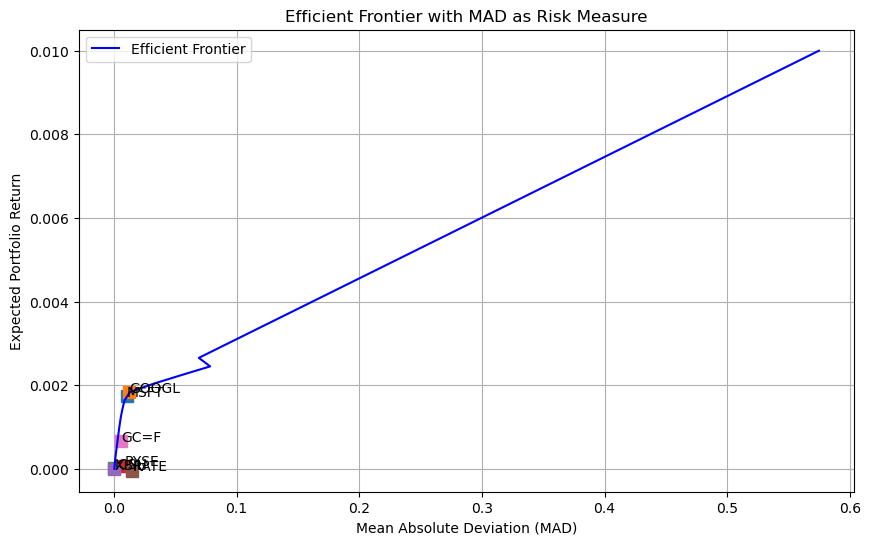

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from scipy import stats
from pulp import *

# Define the symbols for stocks and bonds
assets = [ "MSFT", "GOOGL", "ICSH", "RYSE", "XBIL", "RATE", "GC=F"]

# Fetch historical data for each symbol
data = {}
for symbol in assets:
    data[symbol] = yf.download(symbol, period="1y")

# Create a DataFrame to store the close prices
close_prices = pd.DataFrame(columns=assets)

# Populate the DataFrame with close prices
for symbol in assets:
    close_prices[symbol] = data[symbol]['Close']
close_prices.dropna(inplace=True)

# Calculate returns
returns = close_prices.pct_change().dropna()

# Mean return and mean absolute deviation
mean_return = returns.mean()
mean_absolute_deviation = returns.abs().mean()

# Define the efficient frontier function
def efficient_frontier(R, assets):
    # Define the data
    n = len(assets)  # Number of assets
    T = len(R[:, 0])  # Number of time periods

    m0_array = np.linspace(0.0, 0.01, 50)
    risk_array = np.zeros_like(m0_array)
    portfolio_returns = []
    portfolio_mads = []

    for i, m0 in enumerate(m0_array):
        # Create a LP problem
        prob = LpProblem("Financial_Portfolio_Optimization", LpMaximize)

        # Define decision variables
        x = [LpVariable(f"x{j}", lowBound=0) for j in range(n)]
        y = [LpVariable(f"y{t}", lowBound=0) for t in range(T)]

        # Define objective function
        prob += -(1 / T) * lpSum(y[t] for t in range(T)), "Objective"

        # Define constraints
        for t in range(T):
            prob += (
                lpSum(x[j] * (R[t][j] - mean_return[j]) for j in range(n)) <= y[t],
                f"Upper_constraint_{t}",
            )
            prob += (
                lpSum(x[j] * (R[t][j] - mean_return[j]) for j in range(n)) >= -y[t],
                f"Lower_constraint_{t}",
            )

        prob += lpSum(mean_return[j] * x[j] for j in range(n)) == m0

        prob += lpSum(x) == 1, "Sum_of_weights"

        # Solve the problem
        prob.solve()
        
        # Calculate portfolio return and MAD
        portfolio_return = value(lpSum(mean_return[j] * x[j] for j in range(n)))
        portfolio_mad = value((1 / T) * lpSum(y[t] for t in range(T)))

        # Store portfolio return and MAD
        portfolio_returns.append(portfolio_return)
        portfolio_mads.append(portfolio_mad)

        # Store risk
        risk_array[i] = portfolio_mad
    
    return risk_array, portfolio_returns, portfolio_mads

# Calculate efficient frontier points
risk_array, portfolio_returns, portfolio_mads = efficient_frontier(returns.values, assets)

# Fit a linear regression line to the efficient frontier points
slope, intercept, _, _, _ = stats.linregress(risk_array, portfolio_returns)
efficient_line = slope * risk_array + intercept

# Plot both plots on the same graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plot daily return versus mean absolute deviation
for i, asset in enumerate(assets):
    ax.plot(mean_absolute_deviation[i], mean_return[i], "s", ms=8)
    ax.text(mean_absolute_deviation[i] * 1.03, mean_return[i], asset)

ax.set_title("Daily return versus Mean Absolute Deviation")
ax.set_xlabel("Mean Absolute Deviation in Daily Returns")
ax.set_ylabel("Mean Daily Return")
ax.grid(True)

# Plot efficient frontier
# ax.plot(risk_array, efficient_line, label='Efficient Frontier Line', color='red')
ax.plot(portfolio_mads, portfolio_returns, color='blue', label='Efficient Frontier')
ax.set_xlabel('Mean Absolute Deviation (MAD)')
ax.set_ylabel('Expected Portfolio Return')
ax.legend()
plt.title('Efficient Frontier with MAD as Risk Measure')

plt.show()


#### 2A

In [72]:
# Define the data
R_c = R - r.reshape(1, -1)
sig = np.dot(R_c.T, R_c) / T
r0 = 0.0005
n = len(R[0, :])
e = np.ones((n, 1))
rq = r.reshape(n, 1)

# Define the optimization variables
X = cp.Variable((n, 1))

# Define the objective function
Objective = cp.Minimize(cp.quad_form(X, sig))

# Define the constraints
constraints = [e.T @ X == 1, X >= 0, rq.T @ X >= r0]

# Formulate the optimization problem
problem = cp.Problem(Objective, constraints)

# Solve the problem
result = problem.solve()

# Print the results
print("expected portfolio", X.value.T)
print("expected return :", (rq.T @ X.value)[0] )
print("Mean variance:", (X.value.T @ sig @ X.value)[0] )
print("Mean std:", (X.value.T @ sig @ X.value)[0]**0.5 )

expected portfolio [[6.36928559e-01 2.23696106e-19 2.74309296e-01 3.54624160e-19
  1.58045955e-02 6.84735518e-02 4.48399747e-03]]
expected return : [0.0005]
Mean variance: [7.0436669e-05]
Mean std: [0.00839266]


#### 2B

In [73]:
# Calculate centered returns
R_c = R - r.reshape(1, -1)

# Compute covariance matrix manually
sig = np.dot(R_c.T, R_c) / T

# Define the parameters for the optimization problem
v0 = 0.0003
n = len(R[0])
e = np.ones((n, 1))
rq = r.reshape(n, 1)

# Define decision variables
X = cp.Variable((n, 1))

# Define the objective function
Objective = cp.Maximize(rq.T @ X)

# Define the constraints
constraints = [e.T @ X == 1, X >= 0, cp.quad_form(X, sig) <= v0]

# Formulate the optimization problem
problem = cp.Problem(Objective, constraints)

# Solve the problem
result = problem.solve()

# Display the results
print("Expected Portfolio Weights:", X.value.T)
print("Expected Return:", (rq.T @ X.value)[0])
print("Mean Variance:", (X.value.T @ sig @ X.value)[0])
print("Mean Std:", np.sqrt((X.value.T @ sig @ X.value)[0]))

Expected Portfolio Weights: [[6.77424051e-01 6.25969921e-02 2.13731014e-01 1.18995862e-02
  7.21701594e-07 3.07404390e-02 3.60719549e-03]]
Expected Return: [0.01542339]
Mean Variance: [0.0003]
Mean Std: [0.01732051]


/opt/conda/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


In [74]:
# Calculate centered returns
R_c = R - r.reshape(1, -1)

# Compute covariance matrix manually
sig = np.dot(R_c.T, R_c) / T

# Define parameters for the optimization problem
mu = 0.1
n = len(R[0])
e = np.ones((n, 1))
rq = r.reshape(n, 1)

# Define decision variables
X = cp.Variable((n, 1))

# Define the objective function
Objective = cp.Maximize(mu * rq.T @ X - cp.quad_form(X, sig))

# Define the constraints
constraints = [e.T @ X == 1, X >= 0]

# Formulate the optimization problem
problem = cp.Problem(Objective, constraints)

# Solve the problem
result = problem.solve()

# Display the results
print("Expected Portfolio Weights:", X.value.T)
print("Expected Return:", (rq.T @ X.value)[0])
print("Mean Variance:", (X.value.T @ sig @ X.value)[0])
print("Mean Std:", np.sqrt((X.value.T @ sig @ X.value)[0]))

Expected Portfolio Weights: [[ 7.54842879e-01  2.45157121e-01 -1.14585486e-22  8.73874203e-23
  -1.47134997e-22 -3.26239245e-22 -9.35633680e-23]]
Expected Return: [0.04999666]
Mean Variance: [0.0025479]
Mean Std: [0.05047677]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


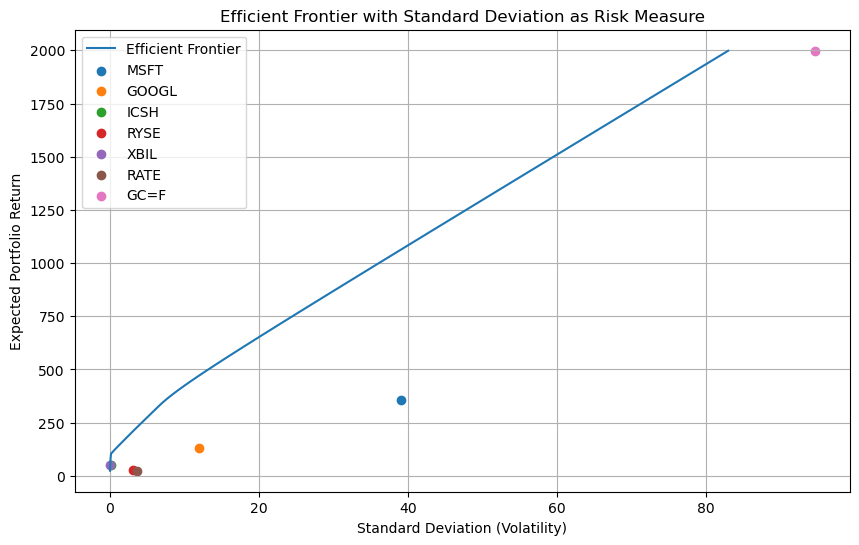

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

# Define the symbols for stocks and bonds
assets = ["MSFT", "GOOGL", "ICSH", "RYSE", "XBIL", "RATE", "GC=F"]

# Fetch historical data for each symbol
data = {}
for symbol in assets:
    data[symbol] = yf.download(symbol, period="1y")

# Create a DataFrame to store the close prices
close_prices = pd.DataFrame(columns=assets)

# Populate the DataFrame with close prices
for symbol in assets:
    close_prices[symbol] = data[symbol]['Close']
close_prices.dropna(inplace=True)

# Calculate daily returns
returns = close_prices.dropna()

# Calculate mean return and covariance matrix
mean_return = returns.mean()
cov_matrix = returns.cov()

# Number of assets
n_assets = len(assets)

# Define the objective function to minimize volatility
def objective_function(weights):
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_std

# Define constraints for optimization
constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]

# Define bounds for each weight (between 0 and 1)
bounds = tuple((0, 1) for _ in range(n_assets))

# Initialize arrays to store portfolio weights and metrics
portfolio_weights = []
portfolio_std = []

# Iterate over a range of target returns to find the efficient frontier
target_returns = np.linspace(mean_return.min(), mean_return.max(), num=100)
for target_return in target_returns:
    # Define constraint for target return
    constraints.append({'type': 'eq', 'fun': lambda weights: np.dot(weights, mean_return) - target_return})
    
    # Minimize volatility for the given target return
    initial_guess = np.repeat(1 / n_assets, n_assets)
    result = minimize(objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints[-1])
    
    # Store results
    portfolio_weights.append(result.x)
    portfolio_std.append(result.fun)

# Convert lists to arrays
portfolio_weights = np.array(portfolio_weights)
portfolio_std = np.array(portfolio_std)

# Plot efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(portfolio_std, target_returns, linestyle='-', marker='', label='Efficient Frontier')

# Plot individual assets as points
for i, symbol in enumerate(assets):
    plt.scatter(np.sqrt(cov_matrix.iloc[i, i]), mean_return[i], marker='o', label=symbol)

plt.title('Efficient Frontier with Standard Deviation as Risk Measure')
plt.xlabel('Standard Deviation (Volatility)')
plt.ylabel('Expected Portfolio Return')
plt.legend()
plt.grid(True)
plt.show()
